Problem Statement:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description    --  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

-

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 

 All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam



 

Predict   CGPA of a student based on different grades in four years.

In [63]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [64]:
grade= pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
grade

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [65]:
grade.shape

(571, 43)

In [66]:
type(grade)

pandas.core.frame.DataFrame

In [67]:
grade.sample()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
220,CS-97221,C+,A-,A-,A,C,A+,B,B+,B,...,C,B,A-,C+,A-,A,B-,B+,A-,3.023


In [68]:
grade.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [69]:
grade.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [70]:
grade.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [71]:
grade.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [72]:
object_datatype = []
for x in grade.dtypes.index:
    if grade.dtypes[x] == 'O':
        object_datatype.append(x)
object_datatype

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412']

In [73]:
le= LabelEncoder()
for col in object_datatype:
    grade[col]= le.fit_transform(grade[col])
    
grade

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,567,1,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,568,3,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,569,0,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


In [74]:
grade['CS-412']=grade['CS-412'].fillna(grade['CS-412'].mean())
grade['CS-412']

0      2
1      3
2      0
3      7
4      0
      ..
566    0
567    2
568    2
569    6
570    8
Name: CS-412, Length: 571, dtype: int32

In [75]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median")
grade['EF-303'] =imp.fit_transform(grade['EF-303']) 
grade['HS-304'] =imp.fit_transform(grade['HS-304'])
grade['CS-301'] =imp.fit_transform(grade ['CS-301'])    
grade['CS-302'] =imp.fit_transform(grade ['CS-302'])      
grade['TC-383'] =imp.fit_transform(grade['TC-383'])           
grade['MT-442'] =imp.fit_transform(grade ['MT-442'])    
grade['EL-332'] =imp.fit_transform(grade ['EL-332'])     
grade['CS-318'] =imp.fit_transform(grade ['CS-318'])     
grade['CS-306'] =imp.fit_transform(grade ['CS-306'])     
grade['CS-312'] =imp.fit_transform(grade ['CS-312'])     
grade['CS-317'] =imp.fit_transform(grade['CS-317'])      
grade['CS-403'] =imp.fit_transform(grade  ['CS-403'])    
grade['CS-421'] =imp.fit_transform(grade ['CS-421'])        
grade['CS-406'] =imp.fit_transform(grade ['CS-406'])    
grade['CS-414'] =imp.fit_transform(grade ['CS-414'])    
grade['CS-419'] =imp.fit_transform(grade ['CS-419'])    
grade['CS-423'] =imp.fit_transform(grade ['CS-423'])    

ValueError: Expected 2D array, got 1D array instead:
array=[ 7.  8.  6.  8.  7.  7.  6.  6.  7.  3.  5.  6.  9.  1.  9.  4.  4.  5.
  7.  7.  9.  3.  7.  4.  4.  5.  7.  9.  7.  7.  6.  9.  9.  5.  1.  5.
  5.  4.  7.  0.  7.  5.  9.  4. 12.  8.  6.  0.  0.  4.  9.  7.  2.  7.
  5.  9.  7.  7.  7.  8. 12.  4.  8.  1.  6.  5.  4.  9.  7.  5.  5.  8.
  6.  7.  5.  9.  4.  4.  9.  4.  5.  6.  5.  9.  5.  7.  9.  8.  7.  2.
  9. 12.  9.  1.  8.  1.  0.  4.  1.  8.  1.  4.  2.  7.  4.  5.  9.  1.
  7.  6.  6.  9.  4.  7.  8.  7.  9.  9.  7.  6.  9.  5.  4.  8.  5.  9.
  8.  4.  5.  5.  7.  9.  8.  7.  9.  9.  9. 12.  9.  8.  6.  7. 12. 12.
  1.  2.  4.  5.  4.  6.  6.  4.  3.  4.  7.  3.  2.  2.  7.  4.  2.  4.
  4.  4.  5.  6.  3.  6.  4.  6.  1.  7.  4.  4.  2.  6.  9.  5.  9.  7.
  4.  6.  2.  5.  4.  4.  5.  7.  6.  7.  5.  2.  3.  2.  9.  2.  3.  4.
  5.  5.  5.  2.  2.  1.  9.  5.  7.  2.  3.  5.  9.  2.  4.  4.  5.  6.
  9.  8.  5.  6.  5.  5.  7.  5.  4.  2.  5.  7.  6.  9.  9.  9.  6.  5.
  3.  2.  6.  9.  6.  2.  4.  6.  6.  6.  6.  7.  5.  7.  6.  5.  4.  6.
  4.  7.  6.  7.  2.  9.  4.  5.  2.  4.  7.  5.  6.  5.  2.  7.  1.  7.
  6.  4.  6.  6.  5.  7.  9.  5.  7.  7.  6. 12. 12.  7.  2.  3.  2.  2.
 12.  3.  4.  3.  3.  6.  3.  4.  5.  2.  2.  2.  2.  4.  2.  4.  4.  2.
  4.  2.  2.  2.  2.  3.  2.  4.  2.  2.  2.  4.  2.  4.  2.  2.  5.  3.
  5.  2.  7.  4.  4.  4.  4.  9.  5.  4.  4.  5.  2.  8.  4.  2.  9.  2.
  6.  5.  5.  7.  4.  2.  9.  2.  5.  2.  9.  6.  4.  2.  4.  4.  4.  2.
  4.  2.  2.  2.  3.  4.  2.  2.  2.  4.  4.  2.  2.  2.  4.  6.  2.  6.
  6.  6.  4.  4.  2.  2.  4.  4.  5.  7.  6.  6.  6.  1.  2.  1.  1.  3.
  1.  2.  3.  2.  2.  2.  3.  4.  7.  7.  2.  3.  4.  6.  6.  6.  4.  6.
  4.  9.  2.  3.  2.  4.  3.  2.  6.  2.  5.  1.  2.  0.  4.  4.  2.  2.
  2.  3.  3.  1.  2.  1.  3.  6.  1.  2.  3.  2.  3.  3.  4.  8.  3.  3.
  1.  2.  3.  4. 11.  3.  2.  2.  2.  0.  1.  1.  3.  0.  3.  2.  2.  5.
  5.  2.  2.  3.  0.  3.  2.  2.  3.  4.  7.  2.  3.  9.  4.  3.  1.  3.
  3.  1.  4.  9.  6.  4.  9.  3.  1.  2.  1.  0.  0.  1.  2.  1.  2.  3.
  0.  2.  2.  1.  4.  9.  2.  2.  2.  7.  3.  3.  4.  3.  3.  4.  3.  6.
  5.  6.  2.  5.  4.  9.  3.  1.  0.  2.  2.  1.  3.  3.  2.  2.  1.  2.
  1.  0.  1.  3.  3.  3.  3.  2.  1.  2. 10.  2.  5.  3.  2.  5.  1.  4.
  3.  1. 10.  3.  4.  2.  4. 12.  2.  0.  2.  8.  8.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [81]:
grade.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,285.000000,3.781086,5.071804,2.921191,4.264448,3.935201,2.838879,4.161121,3.998249,3.921191,...,4.299475,4.982487,3.663748,5.595447,4.770578,2.693520,4.084063,4.211909,4.570928,2.954888
std,164.977776,3.046895,2.785317,2.992228,3.216478,3.034481,2.696709,2.774311,3.075939,2.698100,...,3.580108,2.927134,3.128656,2.916243,4.565881,2.931189,2.656988,3.040475,4.085464,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,142.500000,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,285.000000,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,427.500000,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,570.000000,12.000000,11.000000,13.000000,13.000000,13.000000,10.000000,13.000000,13.000000,12.000000,...,14.000000,12.000000,11.000000,13.000000,14.000000,13.000000,12.000000,12.000000,13.000000,3.985000


In [76]:
grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    int32  
 1   PH-121     571 non-null    int32  
 2   HS-101     571 non-null    int32  
 3   CY-105     571 non-null    int32  
 4   HS-105/12  571 non-null    int32  
 5   MT-111     571 non-null    int32  
 6   CS-105     571 non-null    int32  
 7   CS-106     571 non-null    int32  
 8   EL-102     571 non-null    int32  
 9   EE-119     571 non-null    int32  
 10  ME-107     571 non-null    int32  
 11  CS-107     571 non-null    int32  
 12  HS-205/20  571 non-null    int32  
 13  MT-222     571 non-null    int32  
 14  EE-222     571 non-null    int32  
 15  MT-224     571 non-null    int32  
 16  CS-210     571 non-null    int32  
 17  CS-211     571 non-null    int32  
 18  CS-203     571 non-null    int32  
 19  CS-214     571 non-null    int32  
 20  EE-217    

In [77]:
(grade==0).sum()

Seat No.       1
PH-121       111
HS-101        38
CY-105       177
HS-105/12     96
MT-111       100
CS-105       151
CS-106        56
EL-102        92
EE-119        68
ME-107        77
CS-107       105
HS-205/20    118
MT-222        80
EE-222       122
MT-224        80
CS-210       101
CS-211        67
CS-203        81
CS-214        56
EE-217        97
CS-212        43
CS-215        68
MT-331       118
EF-303        14
HS-304        28
CS-301        66
CS-302        86
TC-383       105
MT-442       130
EL-332        76
CS-318        42
CS-306        74
CS-312        86
CS-317        47
CS-403       133
CS-421        25
CS-406        79
CS-414       176
CS-419        56
CS-423        78
CS-412        77
CGPA           0
dtype: int64

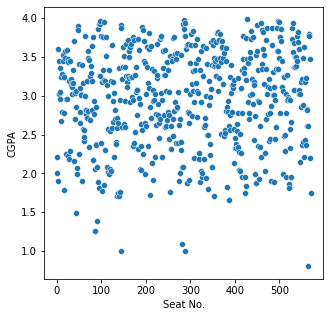

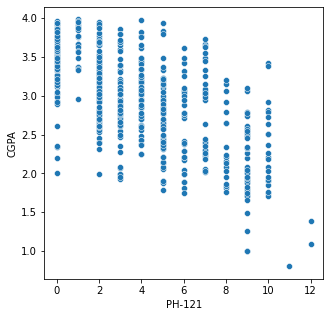

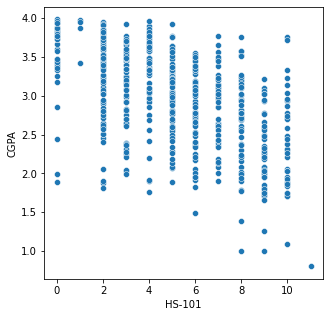

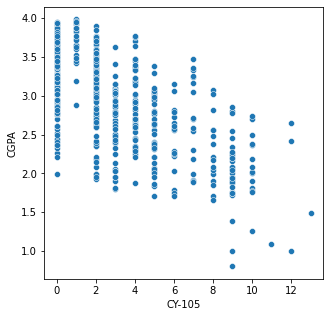

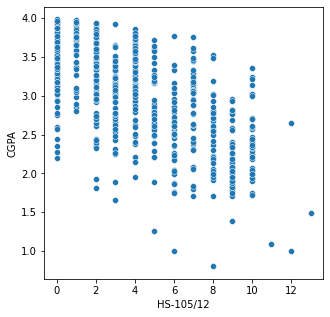

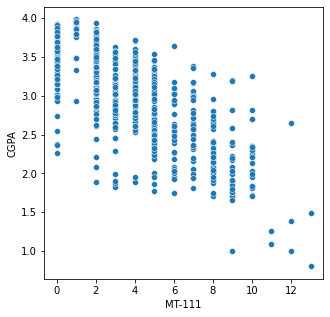

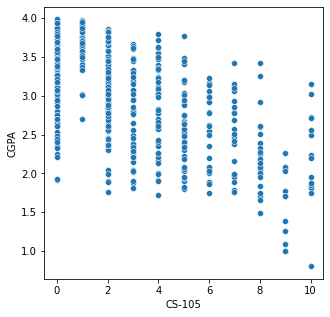

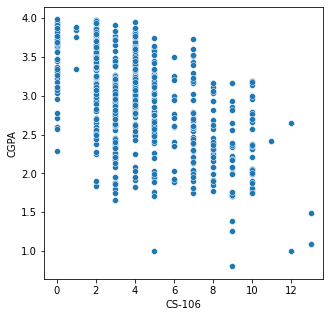

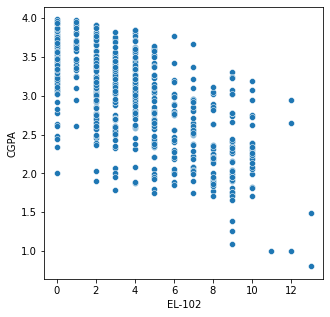

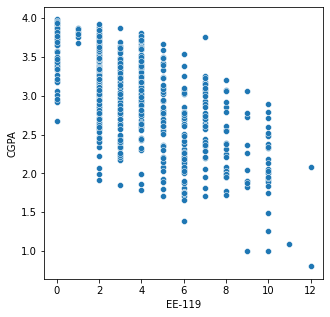

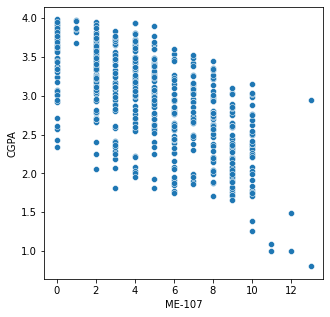

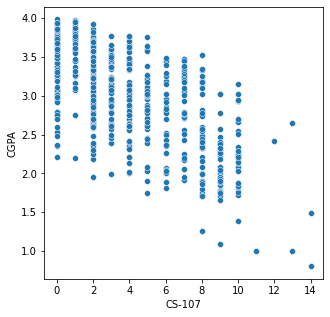

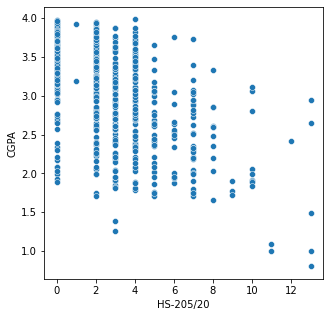

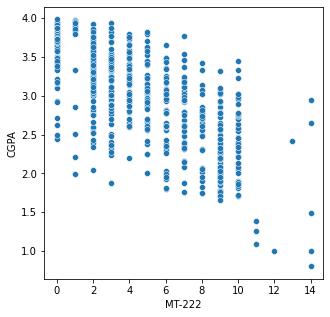

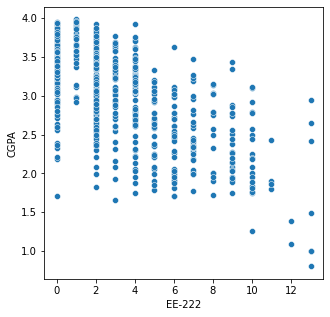

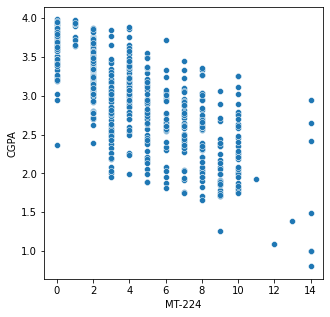

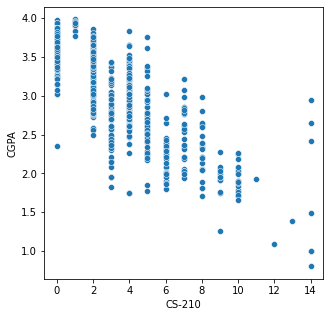

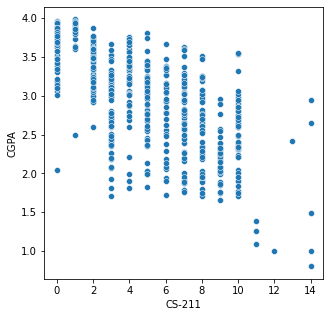

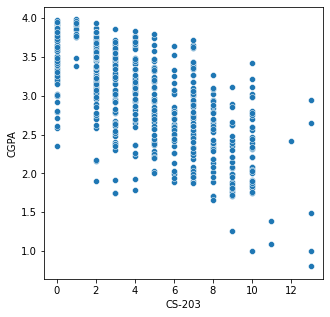

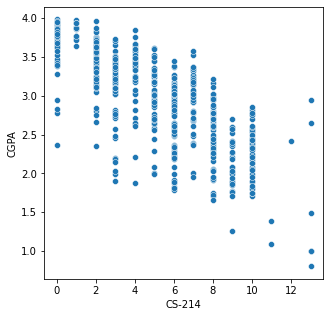

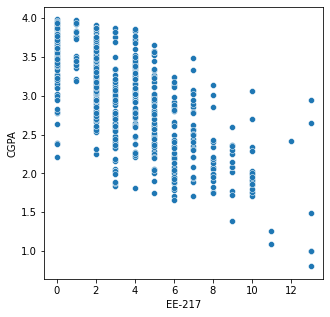

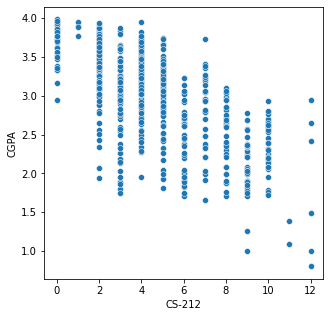

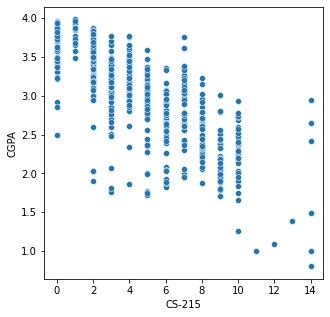

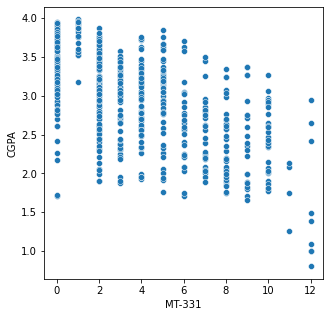

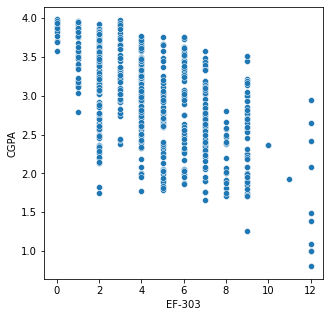

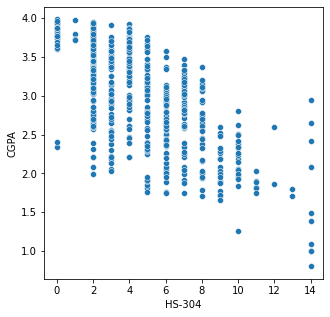

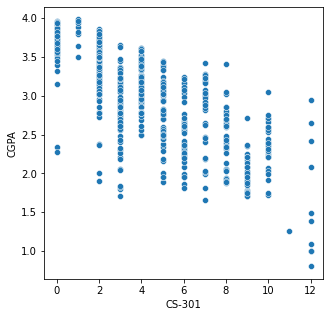

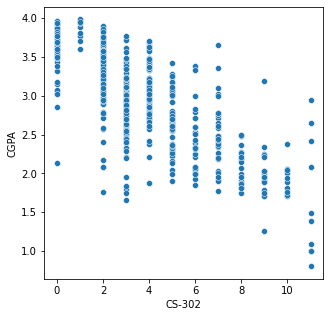

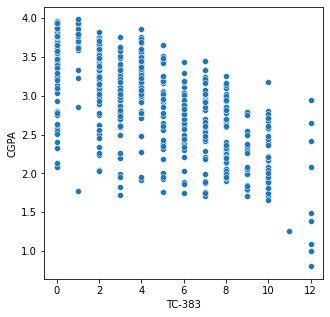

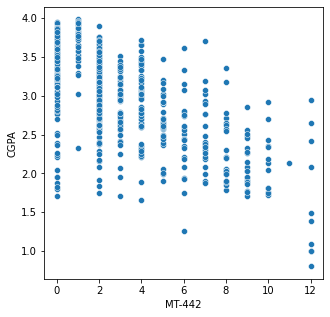

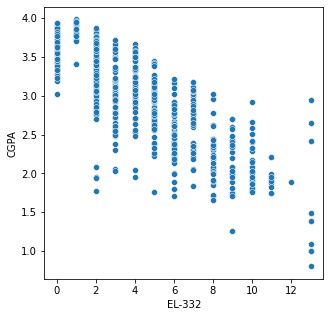

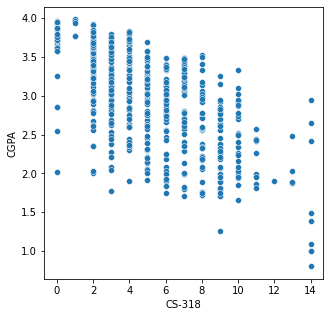

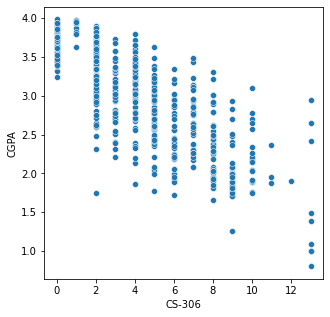

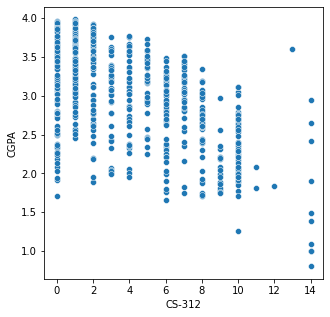

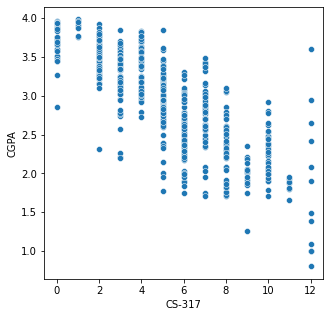

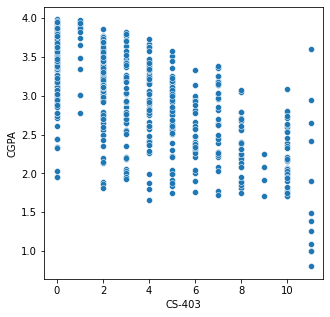

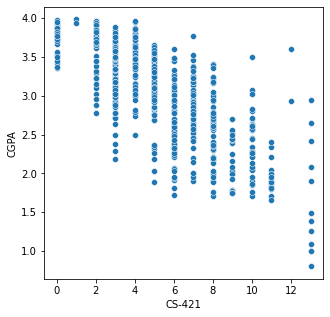

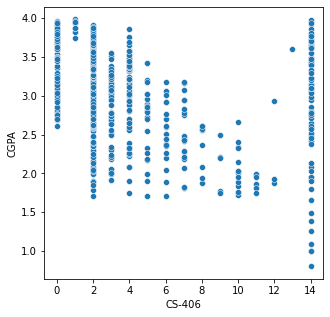

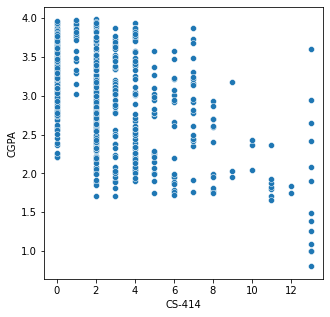

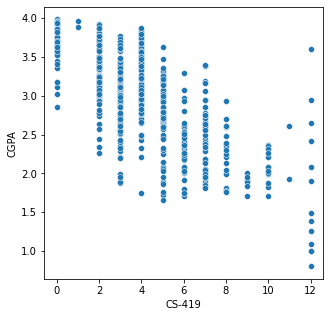

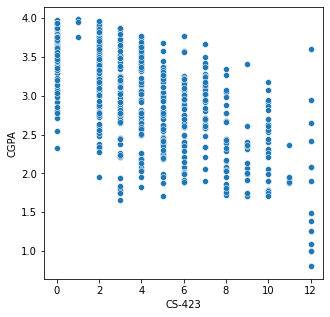

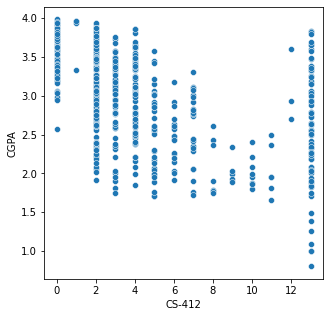

In [78]:
column_nm = list (grade.columns)
for col in grade[column_nm]:
    if col=="CGPA":
        pass
    else:
        fig = plt.figure(figsize = (5,5))
        sns.scatterplot()
        sns.scatterplot(x=col, y="CGPA", data= grade)


In [ ]:
sns.pairplot(grade)
plt.show()

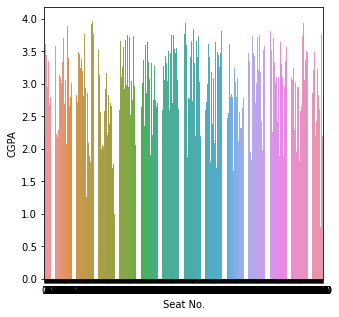

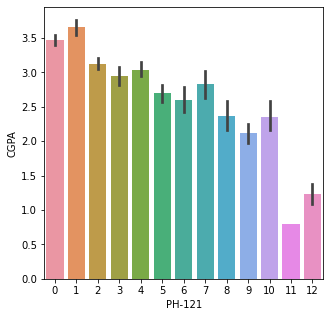

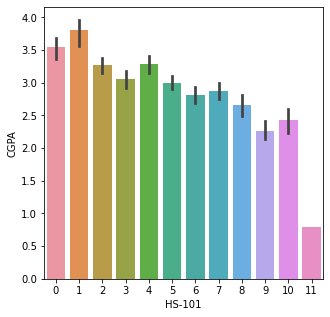

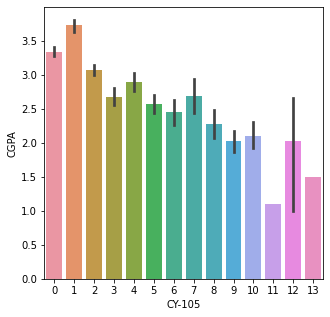

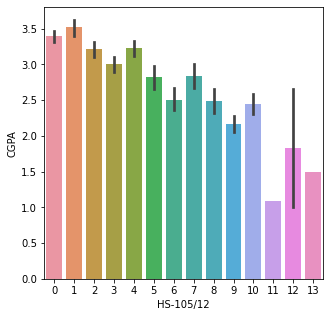

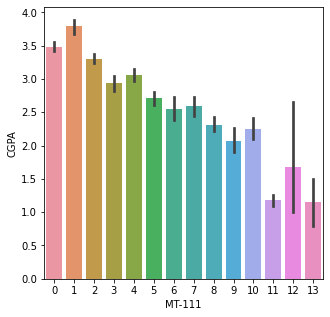

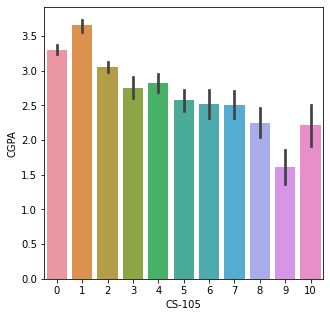

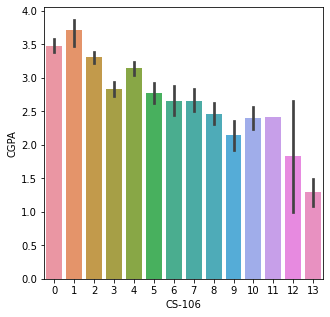

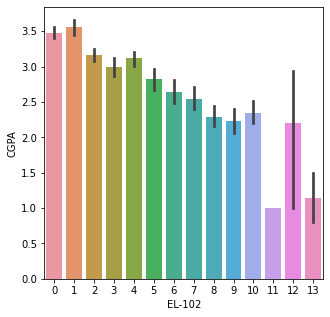

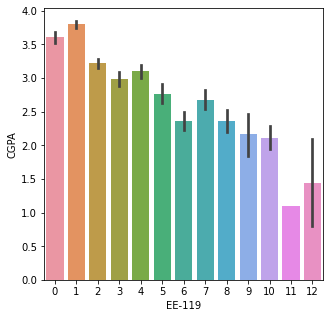

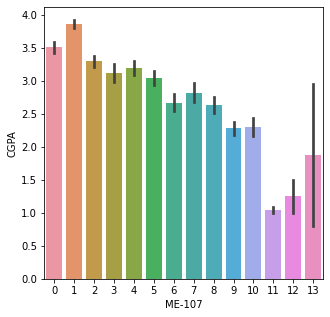

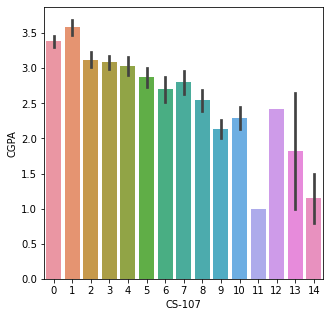

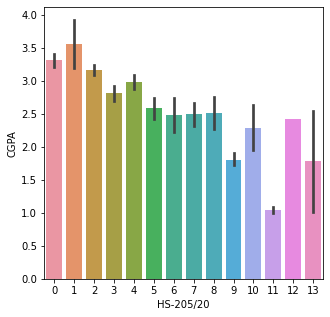

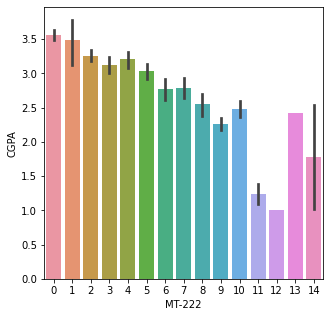

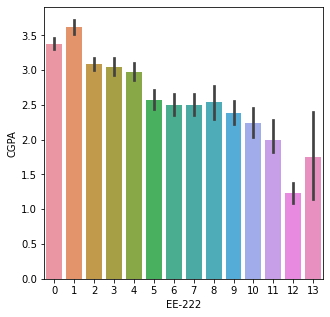

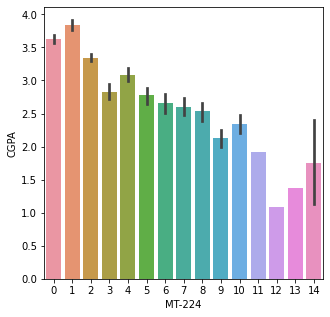

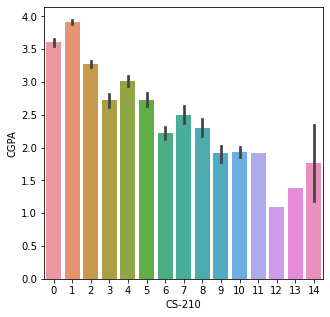

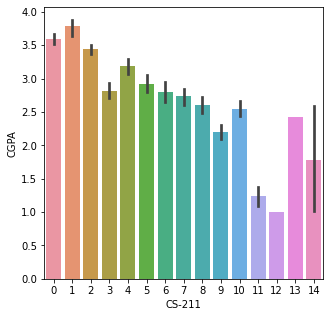

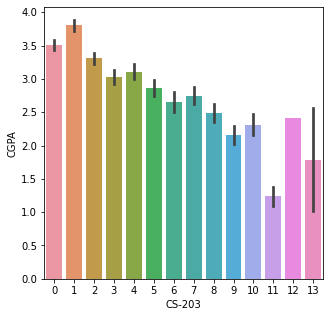

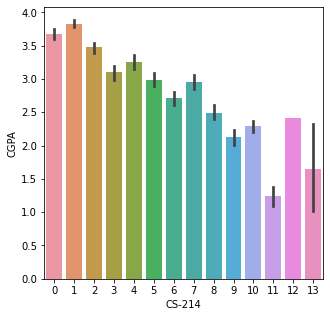

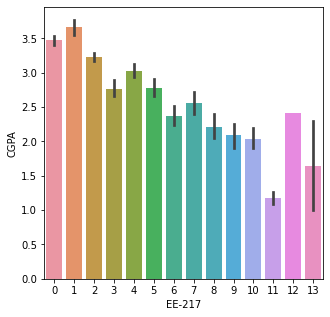

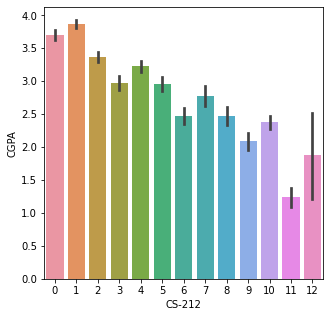

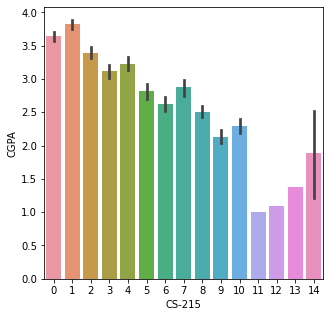

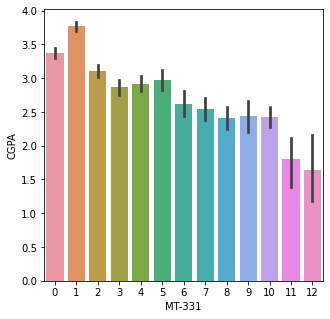

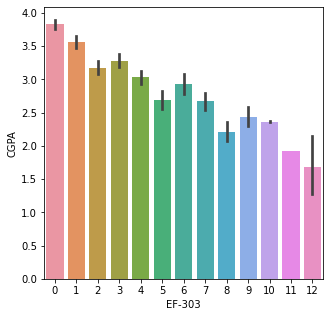

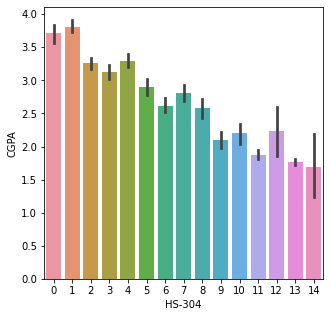

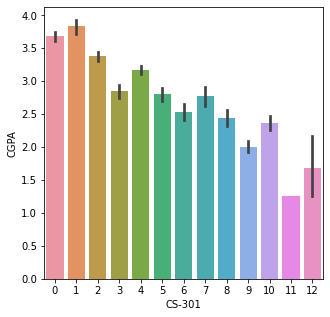

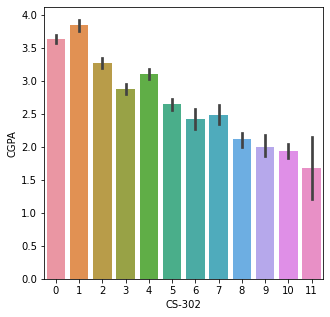

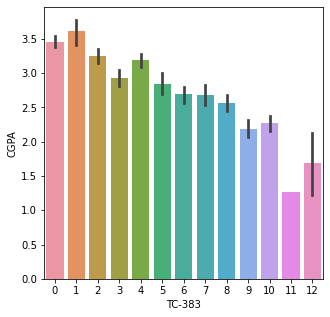

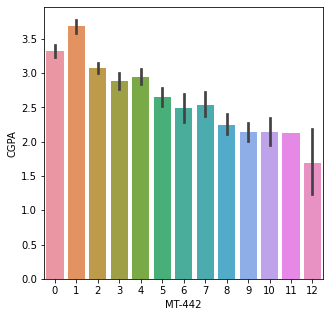

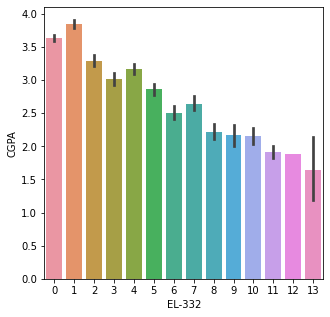

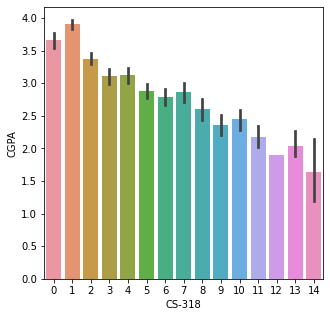

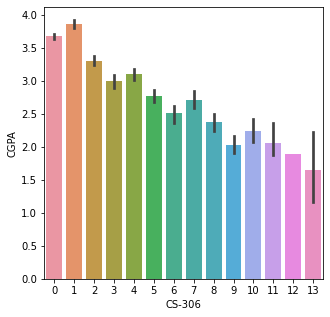

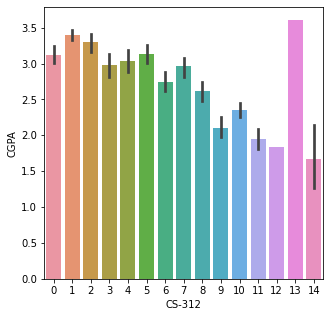

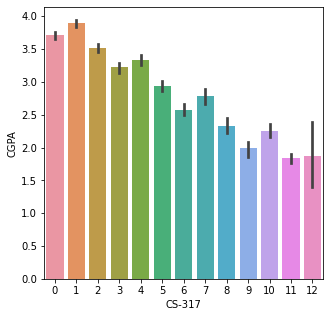

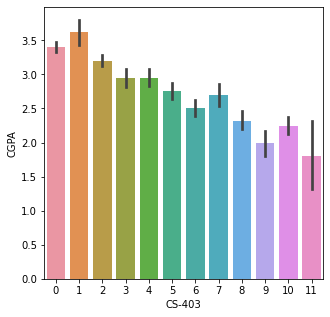

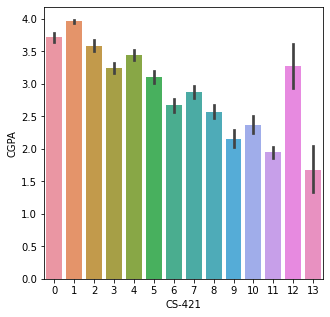

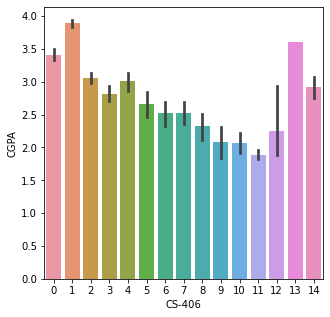

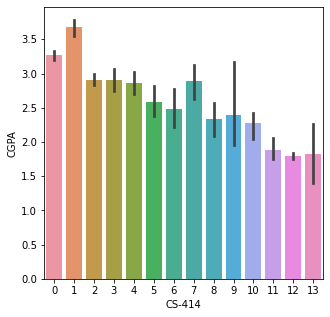

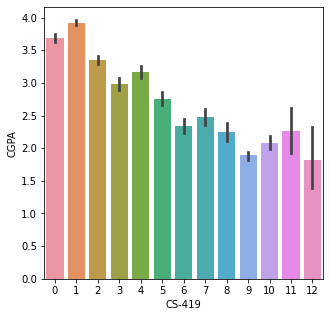

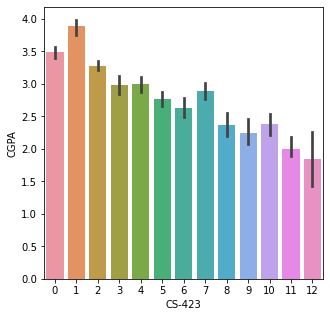

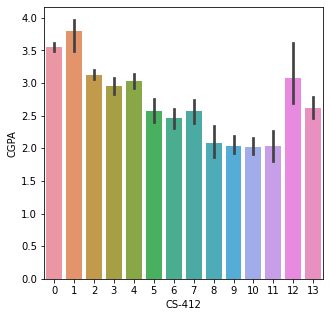

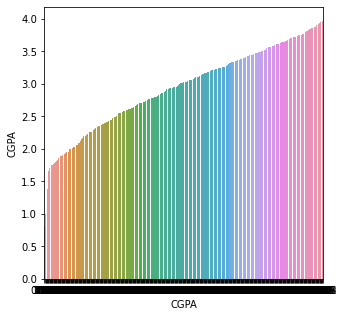

In [82]:
column_nm = list (grade.columns)
for col in grade[column_nm]:
    if col=="CGPA":
        pass
    if col=="Seat No":
        pass
    else:
        fig = plt.figure(figsize = (5,5))
        sns.barplot(y="CGPA", x=col, data= grade)

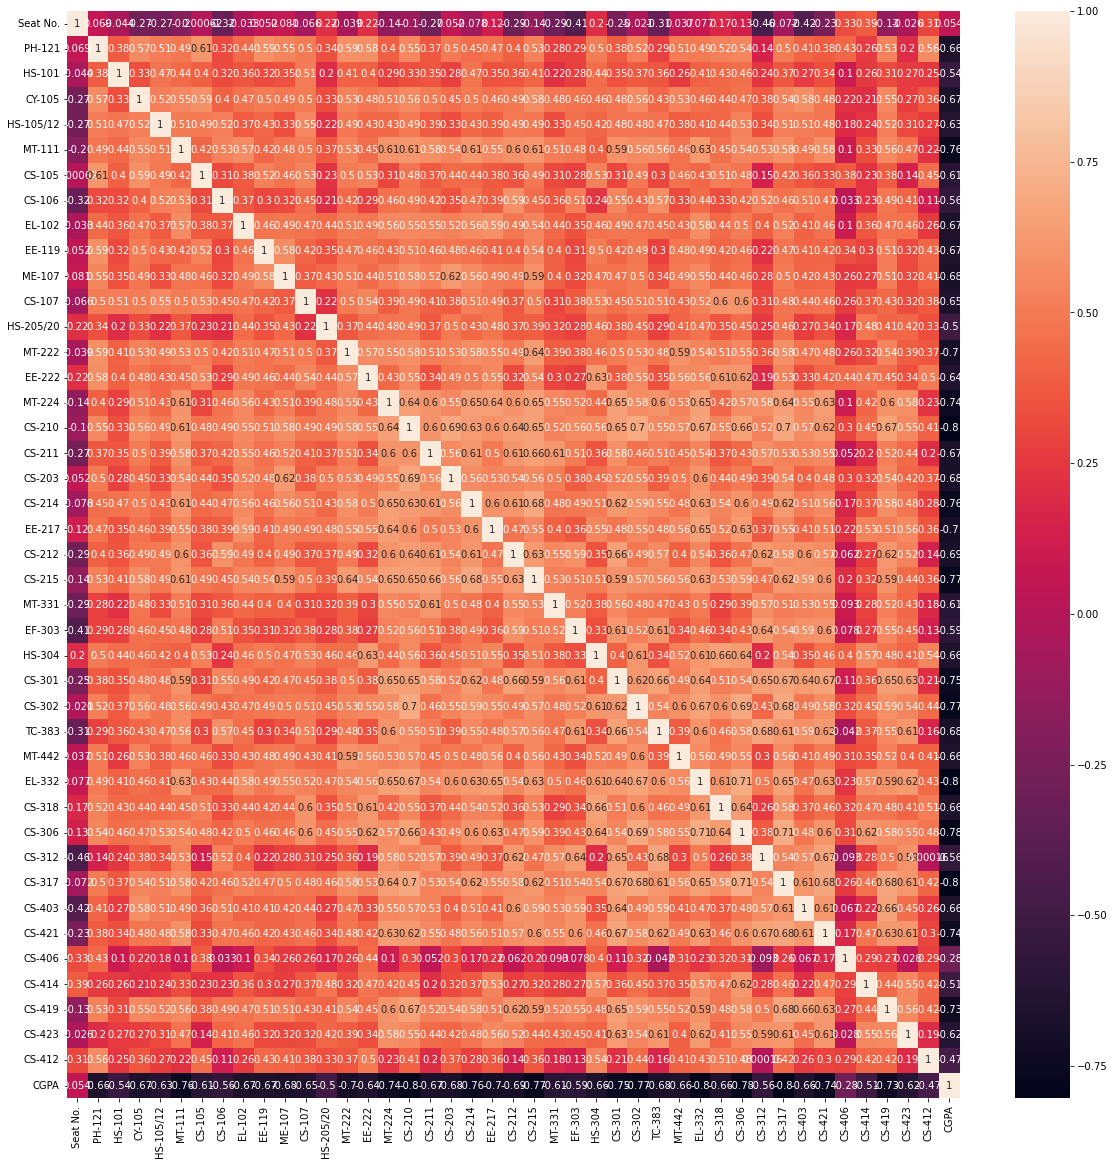

In [83]:
# plotting heat map
plt.figure(figsize = (20,20))
sns.heatmap(grade.corr(),annot = True)
plt.show()

In [84]:
x = grade.drop(columns = ['CGPA'])
y = grade['CGPA']

In [85]:
x.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105       1.001752
HS-105/12    0.337649
MT-111       0.520916
CS-105       0.930769
CS-106       0.682923
EL-102       0.532311
EE-119       0.607213
ME-107       0.131791
CS-107       0.456184
HS-205/20    1.155648
MT-222       0.267531
EE-222       0.864582
MT-224       0.566537
CS-210       0.966469
CS-211       0.202623
CS-203       0.337821
CS-214       0.120394
EE-217       0.876835
CS-212       0.459739
CS-215       0.288215
MT-331       0.674150
EF-303       0.547945
HS-304       0.814333
CS-301       0.489045
CS-302       0.697409
TC-383       0.379712
MT-442       0.970582
EL-332       0.587335
CS-318       0.511718
CS-306       0.575364
CS-312       0.561465
CS-317       0.273812
CS-403       0.638689
CS-421       0.317459
CS-406       1.105583
CS-414       1.592209
CS-419       0.773674
CS-423       0.627219
CS-412       1.086028
dtype: float64

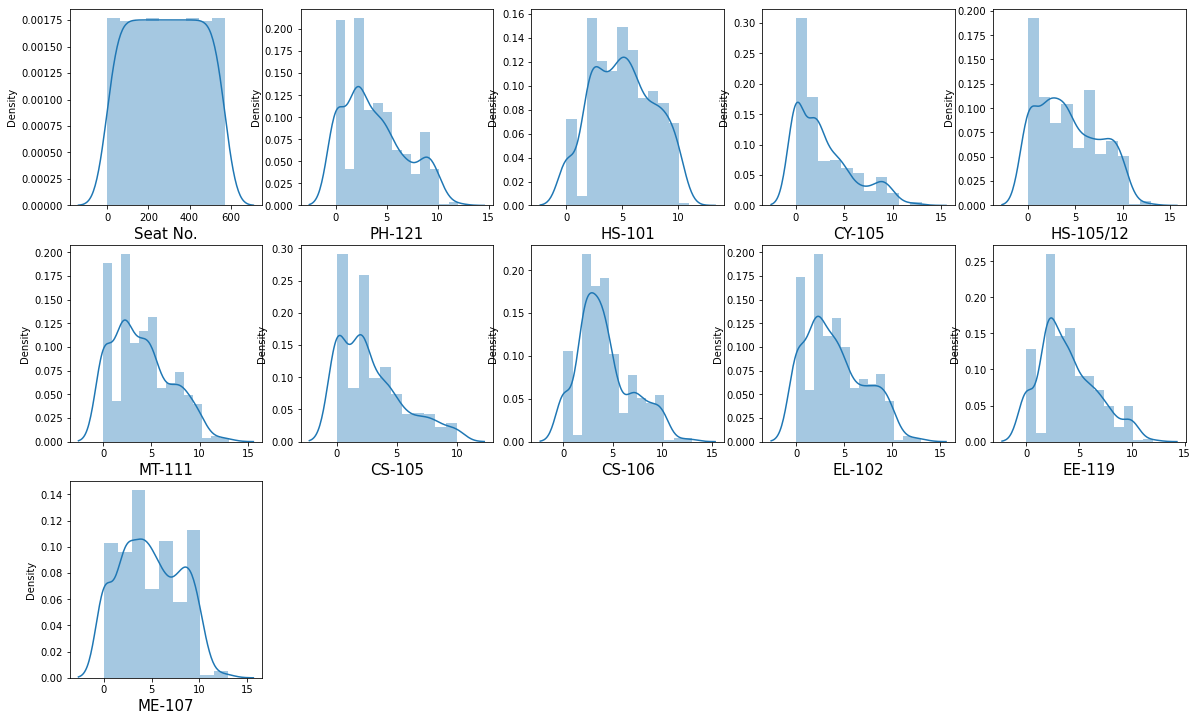

In [86]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21))
plotnum = 1

for col in x:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

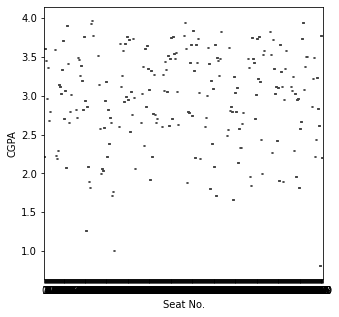

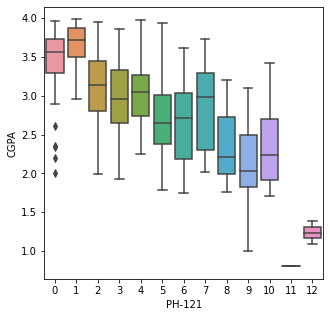

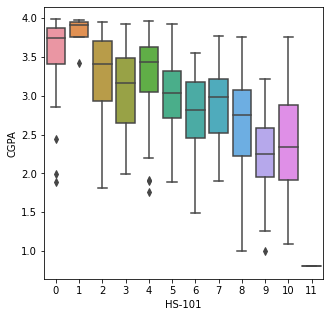

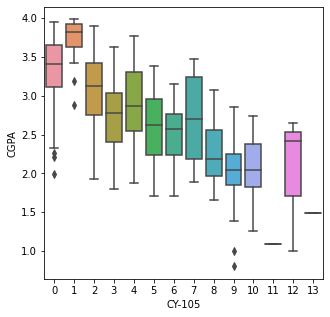

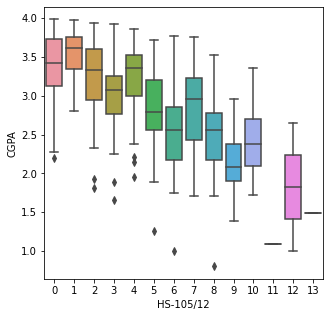

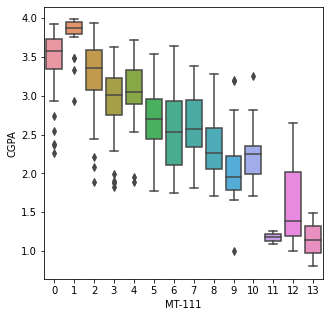

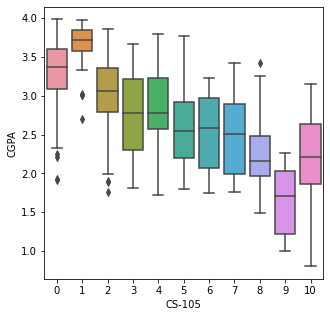

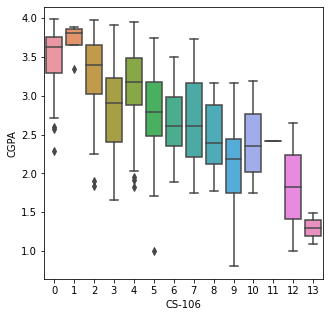

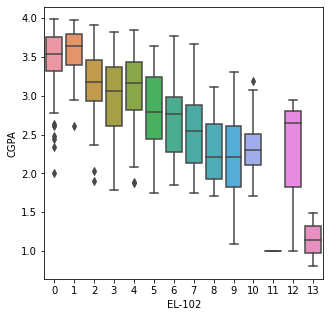

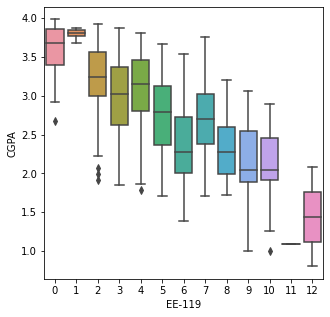

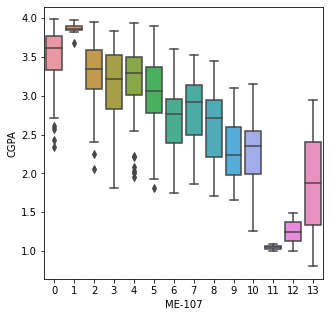

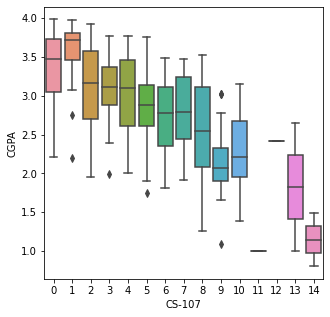

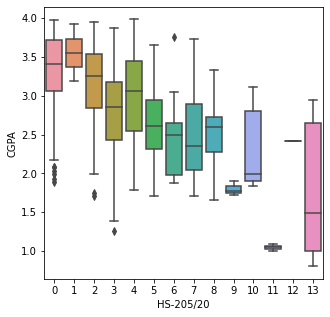

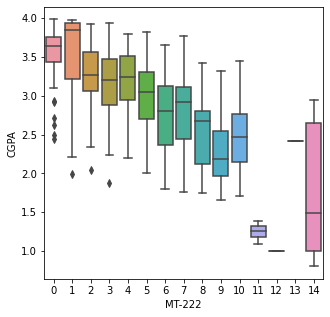

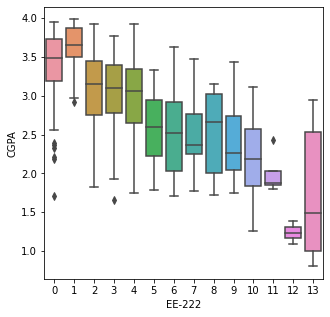

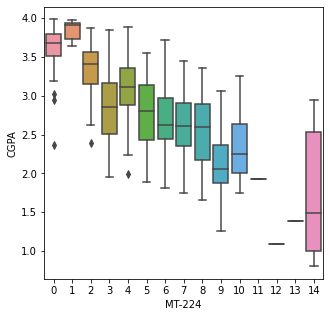

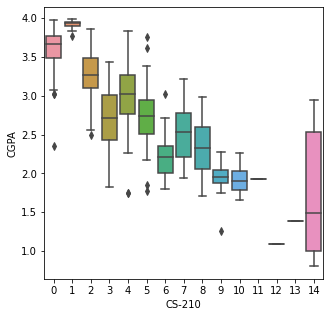

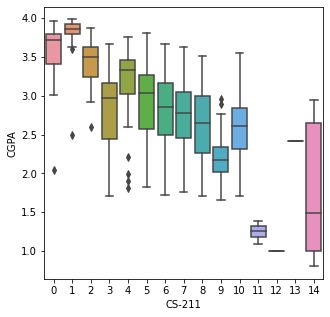

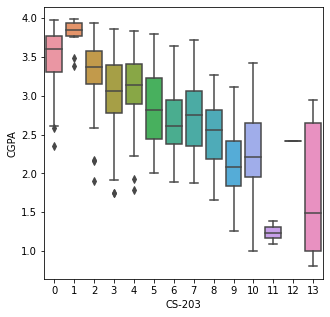

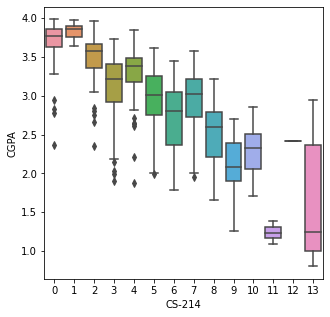

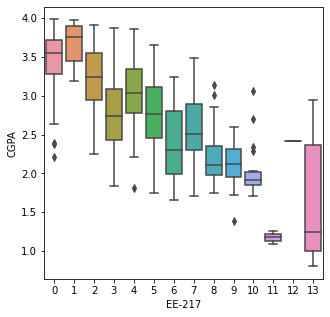

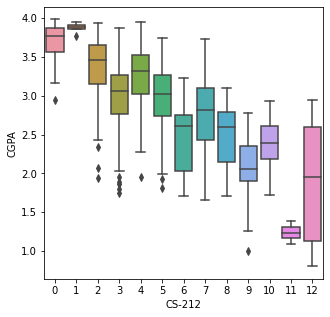

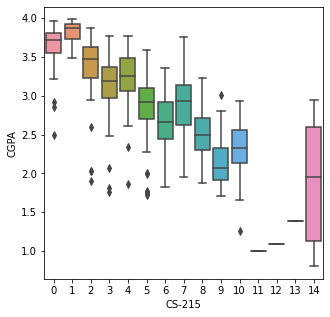

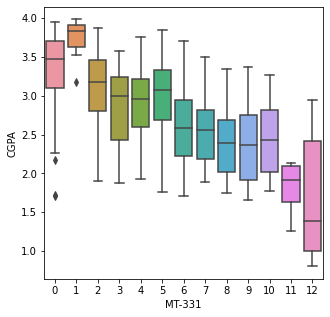

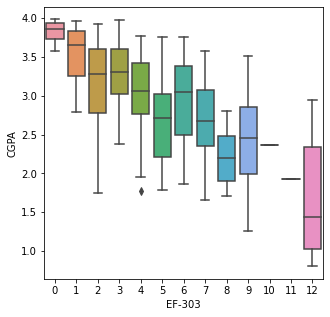

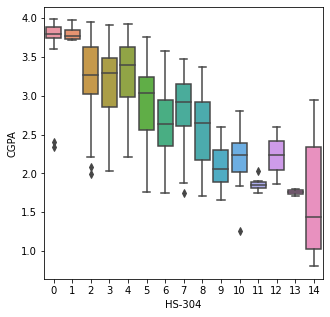

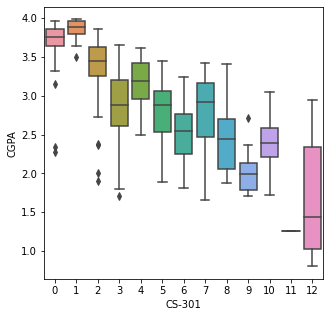

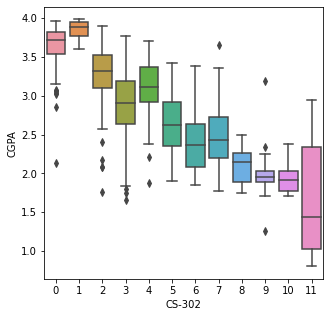

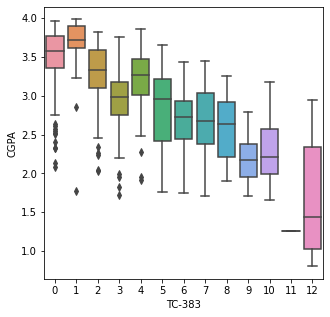

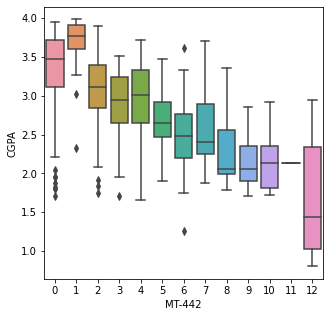

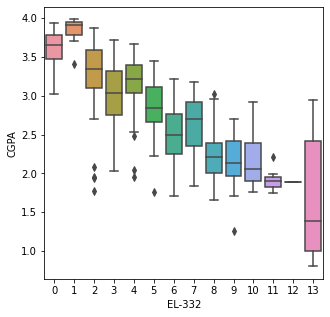

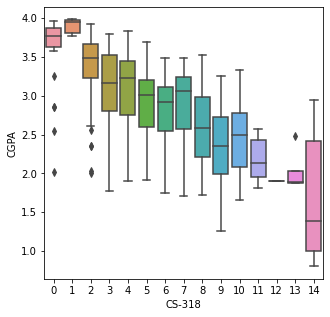

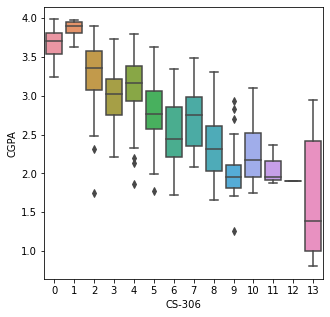

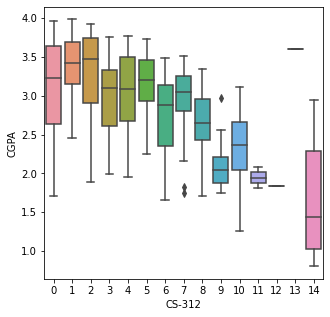

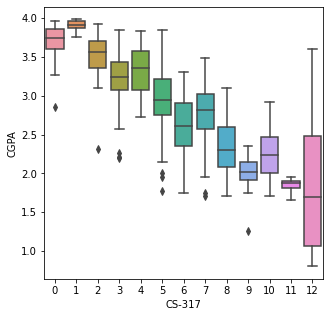

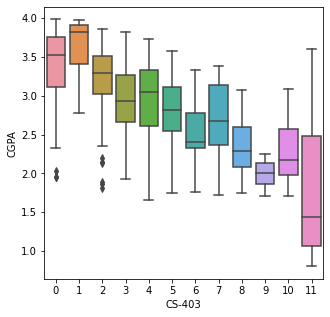

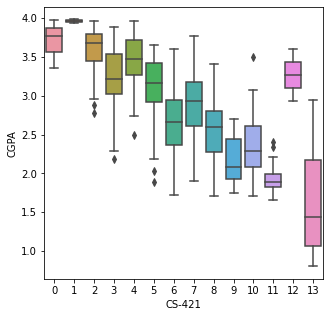

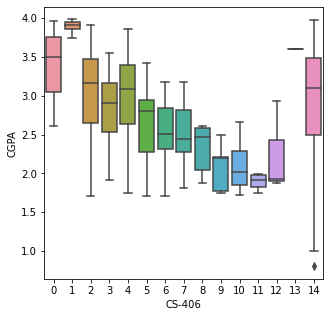

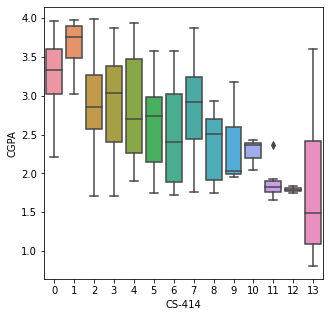

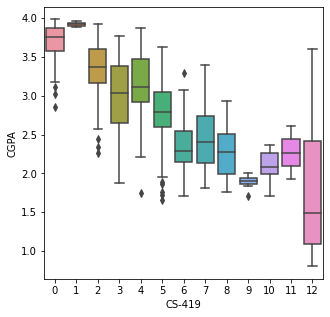

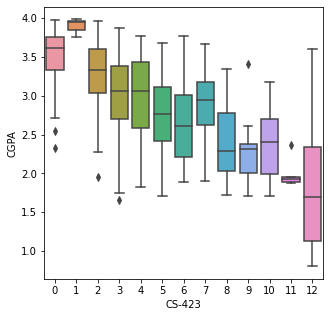

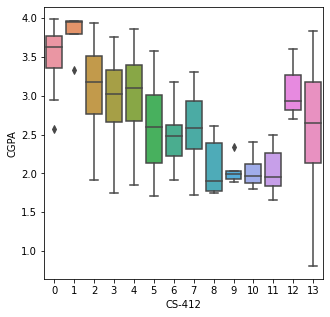

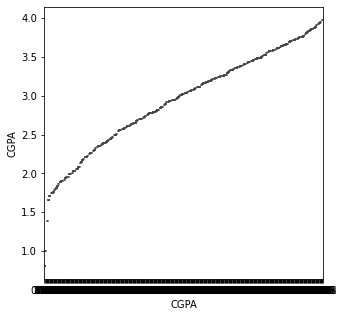

In [87]:
column_nm = list (grade.columns)
for col in grade[column_nm]:
    if col=="CGPA":
        pass
    if col=="Seat No":
        pass
    else:
        fig = plt.figure(figsize = (5,5))
        sns.boxplot(y="CGPA", x=col, data= grade)



Z score method to remove outliers

In [88]:
w= grade.copy()

from scipy.stats import zscore

zscor = zscore(w)
zabs = np.abs(zscor)
df = w[(zabs <3).all(axis=1)] #taking threshold value as 3
print(df.shape)

print(w.shape)

(556, 43)
(571, 43)


In [89]:
# Checking the dataloss in %

loss = (571-556)/571*100
loss

2.626970227670753

In [90]:
print(df.skew())
print('\n')
print(x.skew())

Seat No.    -0.010334
PH-121       0.561325
HS-101       0.059312
CY-105       0.961297
HS-105/12    0.325083
MT-111       0.428842
CS-105       0.963058
CS-106       0.610229
EL-102       0.474081
EE-119       0.553553
ME-107       0.091446
CS-107       0.393008
HS-205/20    0.765317
MT-222       0.167293
EE-222       0.728173
MT-224       0.393790
CS-210       0.647880
CS-211       0.075122
CS-203       0.243867
CS-214       0.006669
EE-217       0.672329
CS-212       0.401048
CS-215       0.120711
MT-331       0.604700
EF-303       0.352310
HS-304       0.515364
CS-301       0.380912
CS-302       0.570915
TC-383       0.321381
MT-442       0.852822
EL-332       0.431139
CS-318       0.333360
CS-306       0.392752
CS-312       0.402160
CS-317       0.150608
CS-403       0.603522
CS-421       0.130217
CS-406       1.214511
CS-414       1.204268
CS-419       0.471732
CS-423       0.496676
CS-412       1.189702
CGPA        -0.331705
dtype: float64


Seat No.     0.000000
PH-121       0.

df is less skewed vis-s-vis x

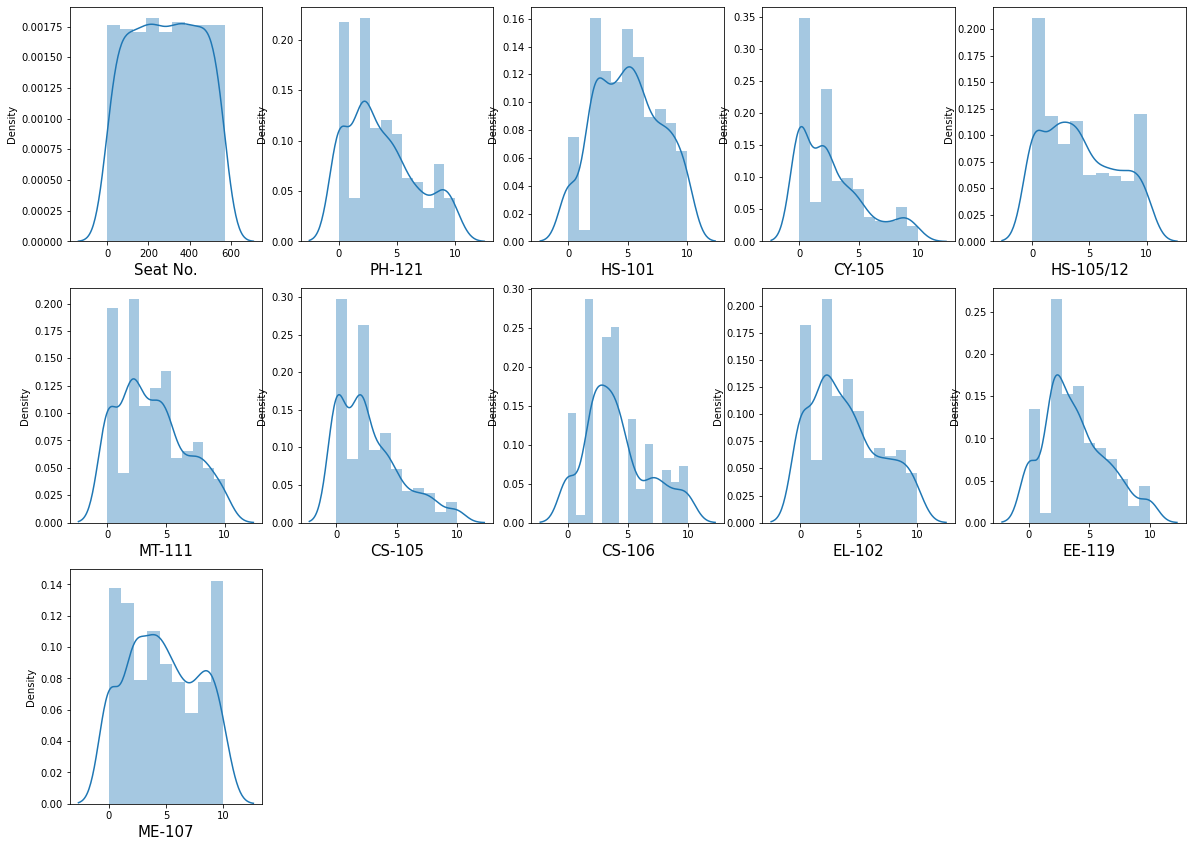

In [91]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in df:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

# Data Standardization

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(df)
scaled_x

array([[-1.73574349,  0.44864407,  1.80585489, ..., -0.36512868,
        -0.60211533, -1.33430541],
       [-1.7296641 , -1.23680256,  1.44377219, ...,  0.69406199,
        -0.34538518, -1.67101424],
       [-1.7235847 , -1.23680256, -0.72872399, ..., -0.71819223,
        -1.11557565,  1.06367675],
       ...,
       [ 1.71735223, -0.22553458, -1.81497208, ..., -0.71819223,
        -0.60211533,  0.82780965],
       [ 1.72343162, -1.23680256, -0.36664129, ...,  0.34099843,
         0.4248053 , -1.35481559],
       [ 1.72951102,  0.78573339,  1.44377219, ...,  1.75325266,
         0.93826561, -2.10685562]])

In [93]:
# Checking for Multicollinearity using Variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = df.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,Seat No.,4.642225
1,PH-121,3.068822
2,HS-101,1.927645
3,CY-105,2.627831
4,HS-105/12,2.457306
5,MT-111,2.837891
6,CS-105,2.501183
7,CS-106,2.000039
8,EL-102,2.248039
9,EE-119,2.323985


# PCA (Principal component Analysis )

In [94]:
# perform PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(df)

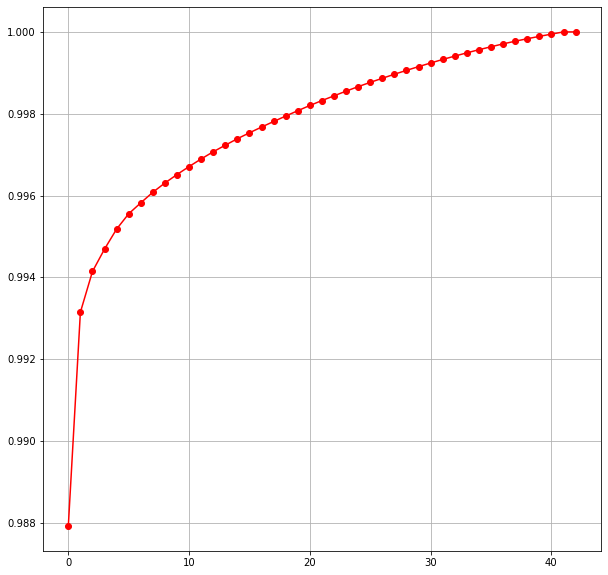

In [95]:
# plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

all columns are important.. there is no curse of dimensionality

# Train Test Split

In [96]:
x = df.drop(columns = ['CGPA'])
y = df['CGPA']

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
for i in range(1,100):
    max_score=0
    maxRs=0
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state=i)
    li = LinearRegression()
    li.fit(x_train,y_train)
    pred = li.predict(x_test)
    score= r2_score(y_test,pred)
    if score>max_score:
        max_score = score
        maxRs=i
print(f"Best Score is: {max_score} on Random State: {maxRs}")

Best Score is: 0.9897759530064628 on Random State: 99


In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state=99)
li = LinearRegression()
li.fit(x_train,y_train)
pred = li.predict(x_test)
print("error")
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))


error
mean_squared_error: 0.0036404267715836863
mean_absolute_error: 0.04861916664377511
0.9897759530064628


In [99]:
#best model has been identified i.e linear regression
#save the model

In [100]:
import joblib
joblib.dump(li,"grade.pkl")


['grade.pkl']